# Блок №4 Проект

Итак, настало время провести свой первый A/B тест! 

# Задание
Представьте, что вы работаете аналитиком в очень крупной компании по доставке пиццы над приложением для курьеров (да, обычно в таких компаниях есть приложение для курьеров и отдельно приложение для потребителей).

У вас есть несколько ресторанов в разных частях города и целый штат курьеров. Но есть одна проблема, к вечеру скорость доставки падает из-за того, что курьеры уходят домой после рабочего дня, а количество заказов лишь растет. Это приводит к тому, что в момент пересмены наша доставка очень сильно проседает в эффективности. 

Наши data scientist-ы придумали новый алгоритм, который позволяет курьерам запланировать свои последние заказы перед окончанием рабочего дня так, чтобы их маршрут доставки совпадал с маршрутом до дома. То есть, чтобы курьеры доставляли последние свои заказы за день как бы "по пути" домой. 

Вы вместе с командой решили раскатить A/B тест на две равные группы курьеров. Часть курьеров использует старый алгоритм без опции "по пути", другие видят в своем приложении эту опцию и могут ее выбрать. Ваша задача – проанализировать данные эксперимента и помочь бизнесу принять решение о раскатке новой фичи на всех курьеров.

Данные можно скачать [тут](https://disk.yandex.ru/d/v5-lEOh3BCIYoQ) 

# Описание данных
+ order_id - id заказа
+ delivery_time - время доставки в минутах
+ district - район доставки
+ experiment_group - экспериментальная группа

In [6]:
# Импортируем библиотеки
import pandas as pd
import numpy as np

import scipy.stats as ss

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(16, 6)}, style='whitegrid')

# Задание 1
___
Для начала давайте сформулируем гипотезы для проверки. Выберите гипотезы, которые мы сможем проверить в этом эксперименте:
- Альтернативная гипотеза (H1): Разница между средним временем доставки в тестовой и контрольной группе есть
- Нулевая гипотеза (H0): Изменение алгоритма не влияет на скорость доставки
- Альтернативная гипотеза (H1): Разницы между средним временем доставки в тестовой и контрольной нет
- Альтернативная гипотеза (H1): Изменение алгоритма влияет на скорость доставки
- Нулевая гипотеза (H0): Разница между средним временем доставки в тестовой и контрольной группе есть
- Нулевая гипотеза (H0): Разницы между средним временем доставки в тестовой и контрольной группе нет

Ответ:
- Нулевая гипотеза (H0): Разницы между средним временем доставки в тестовой и контрольной группе нет
- Альтернативная гипотеза (H1): Разница между средним временем доставки в тестовой и контрольной группе есть

# Задание №2
___
Сопоставьте графики распределения и  экспериментальные группы:

А:
![](https://ucarecdn.com/84dd7581-93ac-4914-81bd-07284b9f62ae/)

B:
![](https://ucarecdn.com/b08ec5ac-4fe8-43fc-bd3d-3edac1349bd0/)

In [3]:
# Путь до файла с данными
path = '/home/jupyter-a.stamati-16/Statistic/experiment_lesson_4.csv'

In [8]:
# Загрузим данные
experiment = pd.read_csv(path)

In [9]:
experiment.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


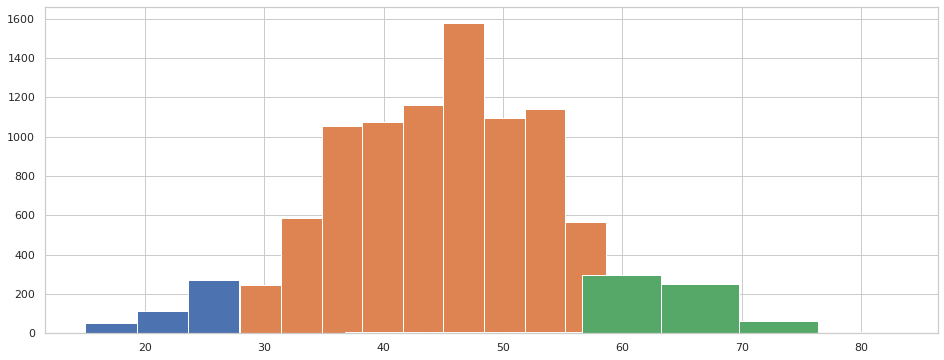

In [11]:
# Построим гистограму для контрольной группы
experiment \
        .query('experiment_group == "control"') \
        .groupby(['district']) \
        .delivery_time \
        .hist();

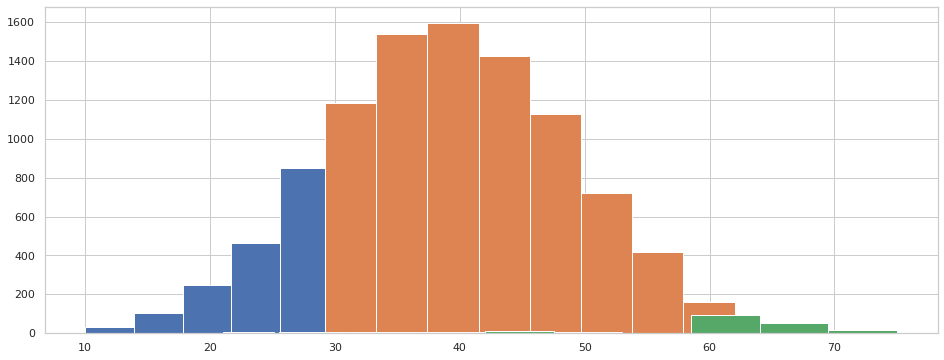

In [10]:
# Построим гистограму для тестовой группы
experiment \
            .query('experiment_group == "test"') \
            .groupby(['district']) \
            .delivery_time \
            .hist();

Ответ:  
+ а -> контроль
+ б -> тест

# Задание 3
___
Посчитайте количество наблюдений в тестовой и контрольной группе. На сколько по модулю отличается количество наблюдений в тесте и контроле?

In [19]:
# Можем посчитать количество наблюдений по группам
cnt = experiment.experiment_group.value_counts()

print(cnt)
print(cnt[0] - cnt[1])

test       10104
control    10092
Name: experiment_group, dtype: int64
12


In [12]:
# Посчитаем количество наблюдений в тестовой группе
experiment_group_test = experiment \
                                .query('experiment_group == "test"') \
                                .experiment_group \
                                .count()

# Посчитаем количество наблюдений в контрольной группе
experiment_group_control = experiment \
                                .query('experiment_group == "control"') \
                                .experiment_group \
                                .count()

In [13]:
# Посчитаем разницу между количеством наблюдений
experiment_group_test - experiment_group_control

12

# Задание 4
___
Теперь давайте изучим наши распределения. Проверим выполнение условий на нормальность и посчитаем стандартное отклонение в тесте и в контроле.

Обязательно сделайте семплирование перед применением критерия при проверке на нормальность (и для теста, и для контроля), так как на больших выборках вы можете получать неверные результаты: 
```
experiment[experiment['experiment_group'] == 'test']['delivery_time'].sample(1000, random_state=17)
```
Почему тест может дать здесь неправильный ответ?

Заполните пропуски ниже:
    
Для того, чтобы проверить нормальность распределения, я использую 
ВЫБРАТЬ
. Этот тест показывает, что значения в тестовой группе распределены 
ВЫБРАТЬ
. В контрольной группе распределение является 
ВЫБРАТЬ
. Стандартное отклонение времени доставки в тесте равно (округлите до сотых) 
ВЫБРАТЬ
. Стандартное отклонение времени доставки в контроле равно (округлите до сотых) 
ВЫБРАТЬ
.

In [14]:
# Семплируем данные для тестов
semple_test = experiment[experiment['experiment_group'] == 'test']['delivery_time'].sample(1000, random_state=17)
semple_control = experiment[experiment['experiment_group'] == 'control']['delivery_time'].sample(1000, random_state=17)

In [17]:
semple_test.head()

17877    37.0
18499    39.0
16476    48.0
14602    30.0
16719    25.0
Name: delivery_time, dtype: float64

In [18]:
semple_control.head()

7144    42.0
6231    42.0
6902    41.0
7032    54.0
2009    44.0
Name: delivery_time, dtype: float64

**Проверяем выборки на нормальность по тесту Шапиро-Уилка**

H0 в Шапиро-Уилка тесте - что распределение нормальное

In [21]:
#  Проверим тестовую группу по тесту Шапиро-Уилка
ss.shapiro(semple_test)

ShapiroResult(statistic=0.9975479245185852, pvalue=0.14013493061065674)

Нормальное распределение, так как pvalue > 0.05

In [22]:
# Проверим контрольную группу по тесту Шапиро-Уилка
ss.shapiro(semple_control)

ShapiroResult(statistic=0.9974725842475891, pvalue=0.12411931157112122)

Нормальное распределение, так как pvalue > 0.05

In [23]:
# Считать стандартное отклонение нужно на оригинальных данных

# Стандартное отклонение в контрольной группе
std_control = round(experiment[experiment['experiment_group'] == 'control']['delivery_time'].std(),2)

# Стандартное отклонение в тестовой группе
std_test = round(experiment[experiment['experiment_group'] == 'test']['delivery_time'].std(),2)

In [24]:
print(f'Стандартное отклонение в тестовой группе {std_test}')
print(f'Стандартное отклонение в контрольной группе {std_control}')

Стандартное отклонение в тестовой группе 9.88
Стандартное отклонение в контрольной группе 9.99


Ответ:

Для того, чтобы проверить нормальность распределения, я использую SHAPIRO-WILK TEST. Этот тест показывает, что значения в тестовой группе распределены НОРМАЛЬНО. В контрольной группе распределение является НОРМАЛЬНЫМ. Стандартное отклонение времени доставки в тесте равно (округлите до сотых) 9.88. Стандартное отклонение времени доставки в контроле равно (округлите до сотых) 9.99

# Задание 5
___
Пришло время сравнить средние в тесте и контроле. Внимание: здесь уже не нужно пользоваться методом .sample() - он нам нужен был только для теста Шапиро-Уилка, остальные тесты надо проводить на полных данных.

Заполните пропуски ниже:

Для сравнения средних в данных экспериментальных группах я использую  ВЫБРАТЬ. Статистика в тесте равна (округлите до целого) ВЫБРАТЬ, p-value ВЫБРАТЬ

In [ ]:
# Проведем парный t-t тест (t-t тест Стьюдента)

In [27]:
ss.ttest_ind(experiment[experiment['experiment_group'] == 'test']['delivery_time'], \
             experiment[experiment['experiment_group'] == 'control']['delivery_time'])

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

Ответ:

Для сравнения средних в данных экспериментальных группах я использую STUDENT'S T-TEST. Статистика в тесте равна (округлите до целого) -43, p-value <= 0.05.

# Задание 6
___
На сколько процентов изменилось среднее время доставки в тестовой группе по сравнению с контрольной (округлите до сотых)? 

Знак изменения необходимо учесть!

In [29]:
# Найдем среднее время доставки в тестовой группе
experiment_test_mean = experiment[experiment['experiment_group'] == 'test']['delivery_time'] \
                                                                .mean()
experiment_test_mean

39.04681314330958

In [30]:
# Найдем среднее время доставки в контрольной группе
experiment_control_mean = experiment[experiment['experiment_group'] == 'control']['delivery_time'] \
                                                                .mean()
experiment_control_mean

45.065101070154576

In [33]:
perc = (experiment_test_mean - experiment_control_mean) / experiment_control_mean * 100
round(perc, 2)

-13.35

# Задание 7
___
Что в итоге? Катим? 

Выберите вариант ответ:
- Не катим, так как среднее время доставки статистически значимо не изменилось.
- Да, раскатываем новый алгоритм на всех, так как среднее время доставки статистически значимо изменилось. Среднее время доставки в тесте больше, чем в контроле.
- Да, раскатываем на всех, новый алгоритм напрямую влияет на скорость доставки.
- Да, раскатываем новый алгоритм на всех, так как среднее время доставки статистически значимо изменилось. Среднее время доставки в тесте меньше, чем в контроле.

Ответ:
- Да, раскатываем новый алгоритм на всех, так как среднее время доставки статистически значимо изменилось. Среднее время доставки в тесте меньше, чем в контроле.